# Walmart Stocks Data 2025

### Data Preprocessing & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [2]:
# check five rows of the dataset
df = pd.read_csv('walmart_stock_prices.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


In [3]:
# check information to inspect datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13233 non-null  object 
 1   Open          13233 non-null  float64
 2   High          13233 non-null  float64
 3   Low           13233 non-null  float64
 4   Close         13233 non-null  float64
 5   Volume        13233 non-null  int64  
 6   Dividends     13233 non-null  float64
 7   Stock Splits  13233 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 827.2+ KB


In [4]:
# Convert Date to datetime type
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_123984\1872202994.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
# sort the data by date for time series data
df = df.sort_values('Date').reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


In [6]:
# Check for missing values
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
# If duplicates exist, removing them 
df = df.drop_duplicates()


In [8]:
# Quick summary statistics
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,13233.000000,13233.000000,13233.000000,13233.000000,1.323300e+04,13233.000000,13233.000000
mean,11.942685,12.047041,11.840625,11.946184,2.244184e+07,0.000922,0.001587
std,15.857590,15.979783,15.739790,15.865461,1.839004e+07,0.011606,0.058295
min,0.002839,0.002839,0.002617,0.002839,0.000000e+00,0.000000,0.000000
25%,0.331929,0.335493,0.329170,0.332387,1.190220e+07,0.000000,0.000000
50%,7.361626,7.430911,7.237296,7.350794,1.875690e+07,0.000000,0.000000
75%,14.864691,15.031126,14.768921,14.910342,2.801850e+07,0.000000,0.000000
max,105.300003,105.300003,103.599998,105.050003,3.955008e+08,0.208000,3.000000


### Data Visualizations

#### Line Plot – Analyze trends in closing prices over time.

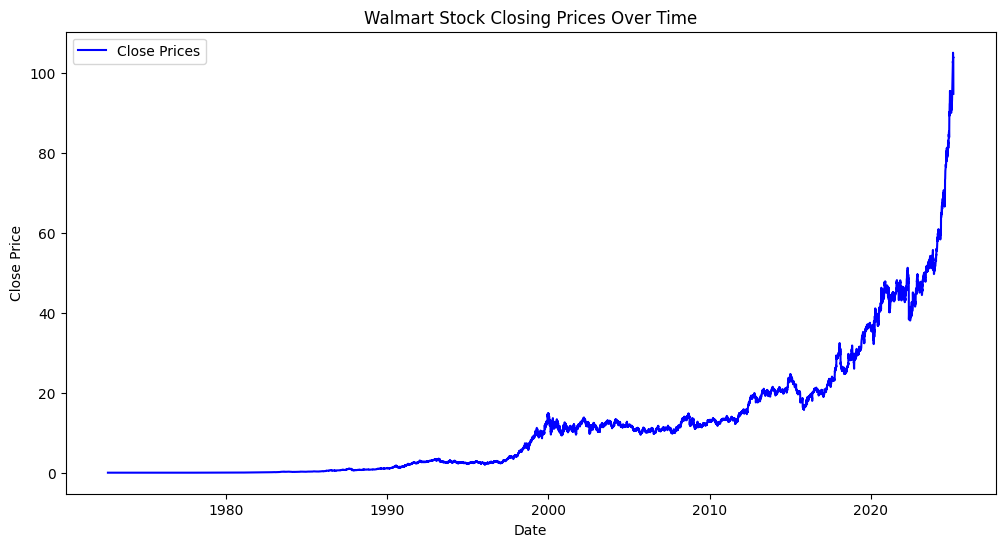

In [9]:
df.set_index('Date', inplace=True)
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = 'Close Prices', color = 'blue')
plt.title('Walmart Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend();

####  Box Plot – Detect potential outliers in stock prices.

In [10]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


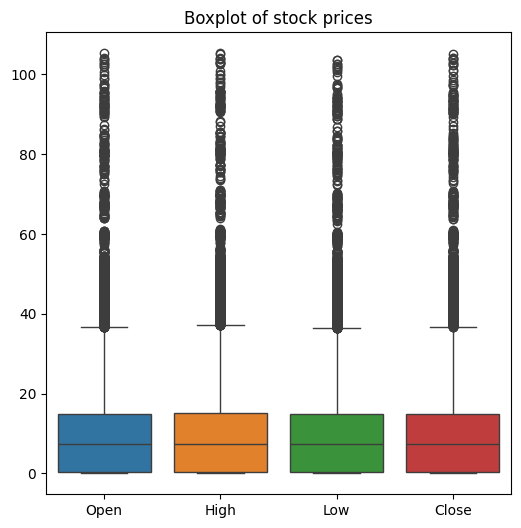

In [11]:
plt.figure(figsize=(6,6))
sns.boxplot(data = df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of stock prices');

#### Histogram – Understand the distribution of closing prices.

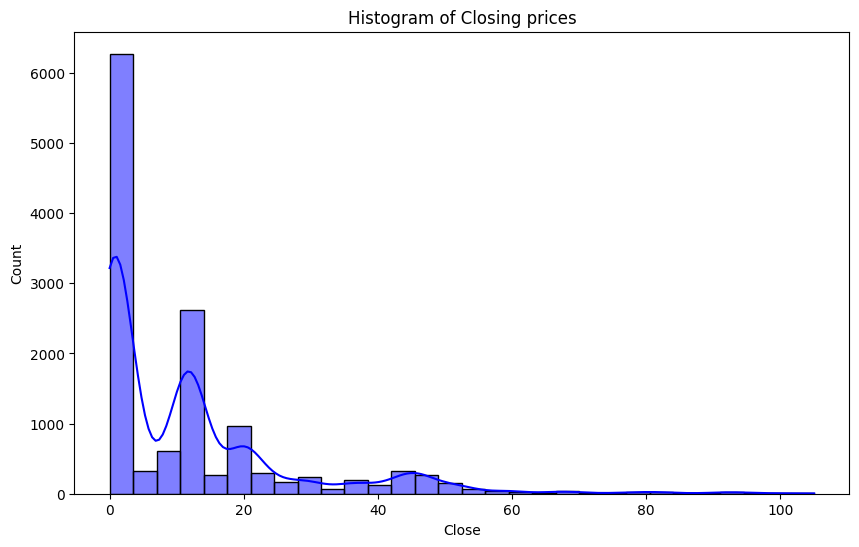

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Close'],kde=True, color='blue',bins = 30)
plt.title('Histogram of Closing prices');

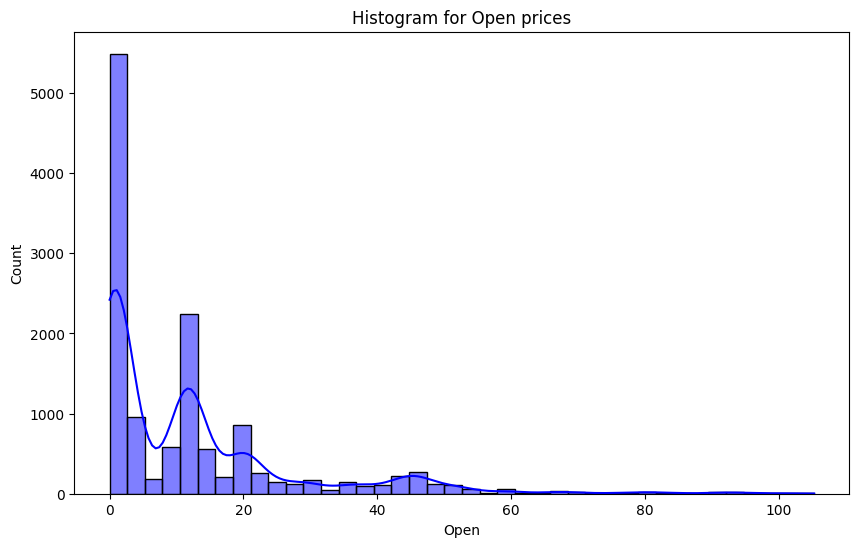

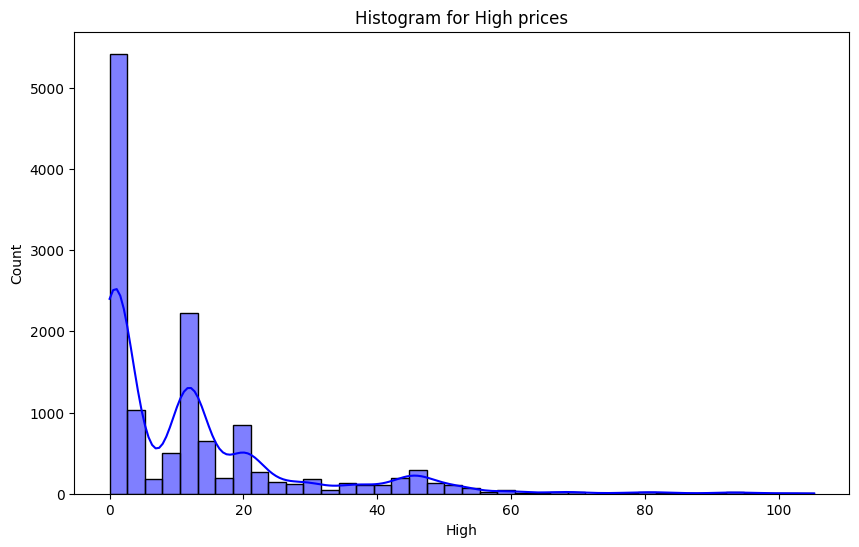

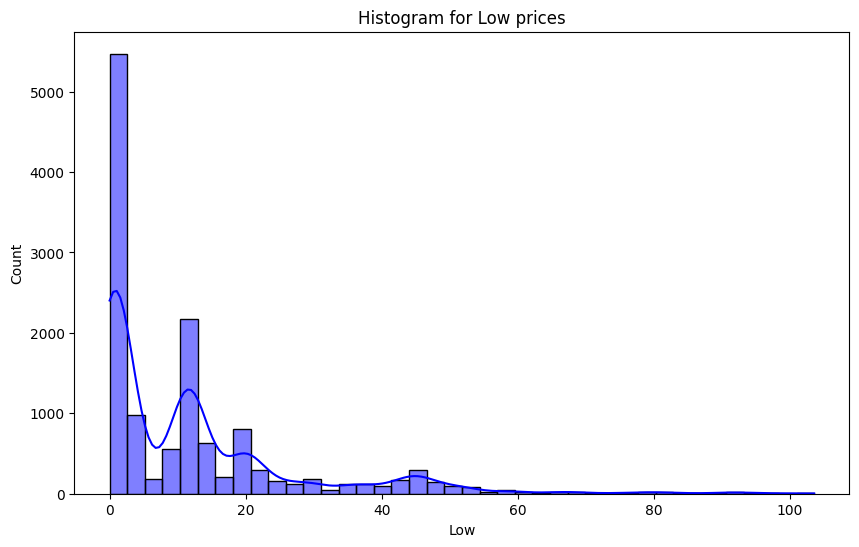

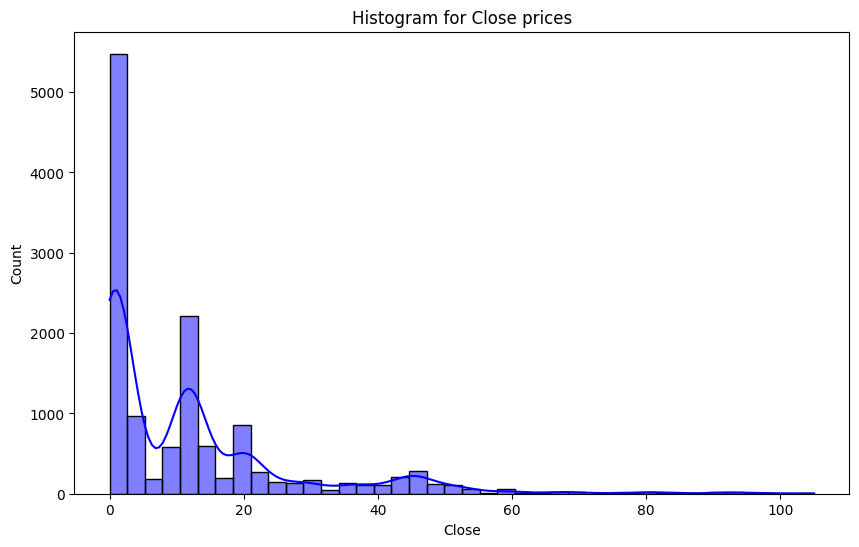

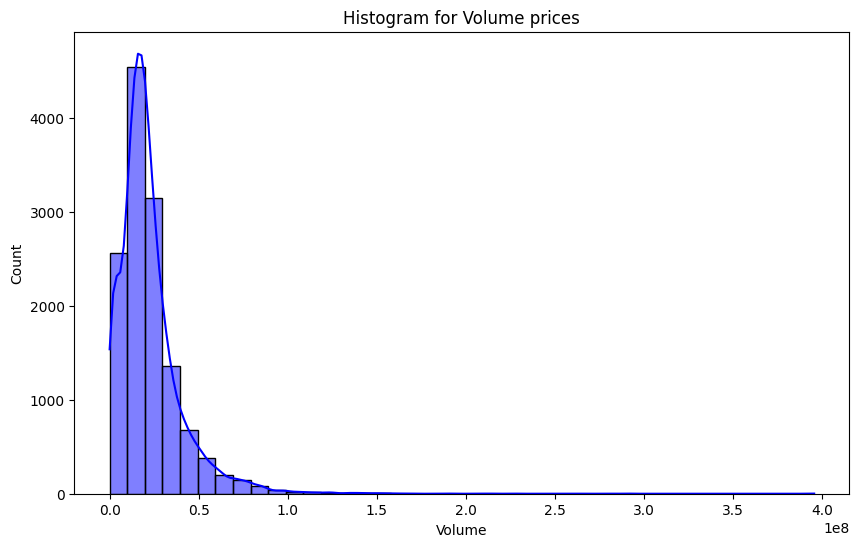

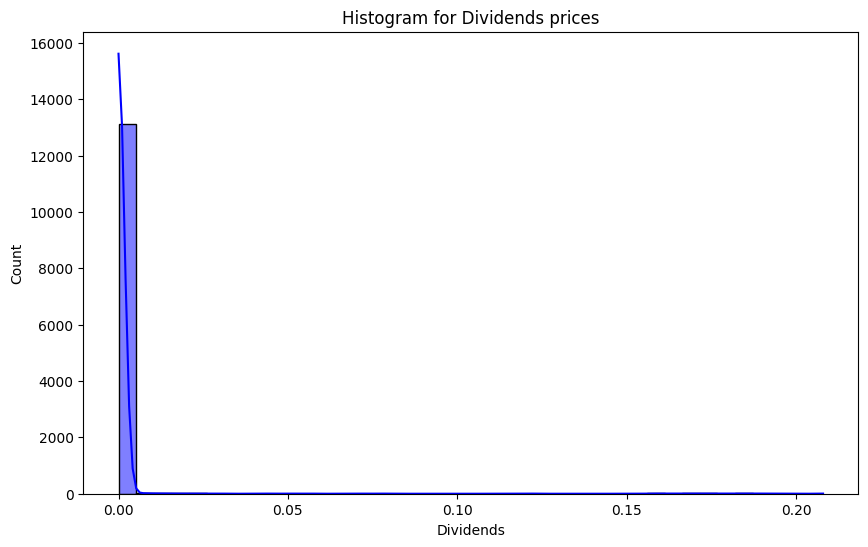

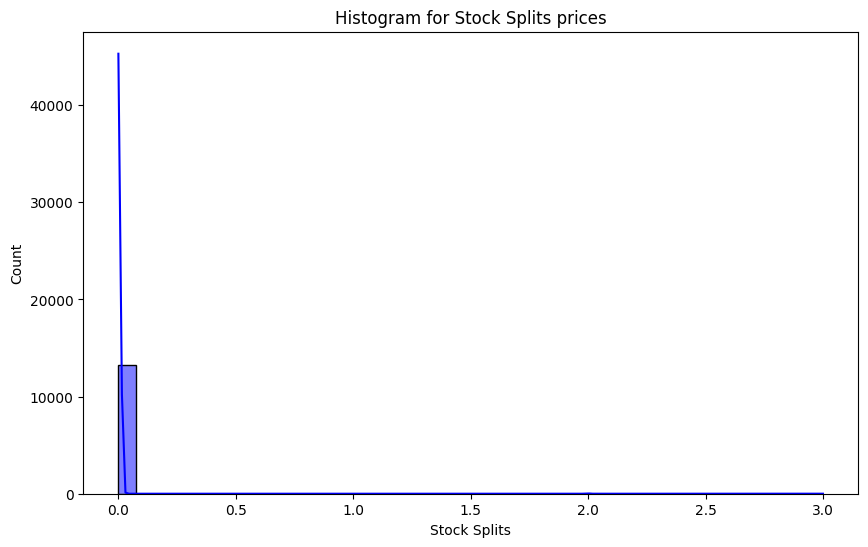

In [13]:
df_columns = df.columns
for col in df_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col],kde=True,color='blue',bins=40)
    plt.title(f'Histogram for {col} prices')
    plt.xlabel(col)
    plt.ylabel('Count')


#### Moving Averages – Use short-term and long-term moving averages to observe stock trends

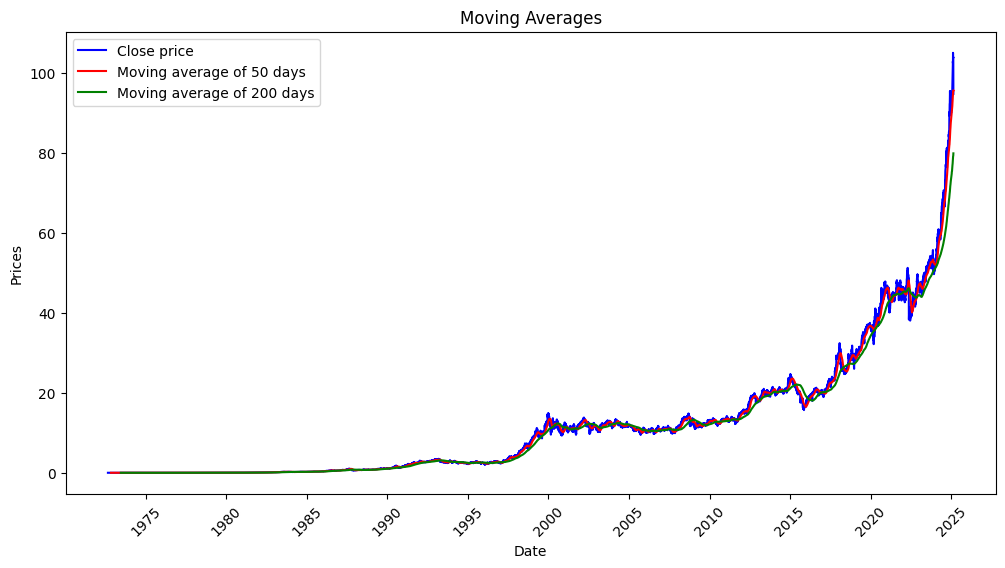

In [14]:
df['SMA50'] = df['Close'].rolling(50).mean()
df['SMA200'] = df['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = 'Close price', color='blue')
plt.plot(df['SMA50'], label = 'Moving average of 50 days', color='red')
plt.plot(df['SMA200'], label = 'Moving average of 200 days', color = 'green')  
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Ticks every 5 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year
plt.xticks(rotation=45)
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend();


#### Correlation Heatmap – Find relationships between stock market indicators.

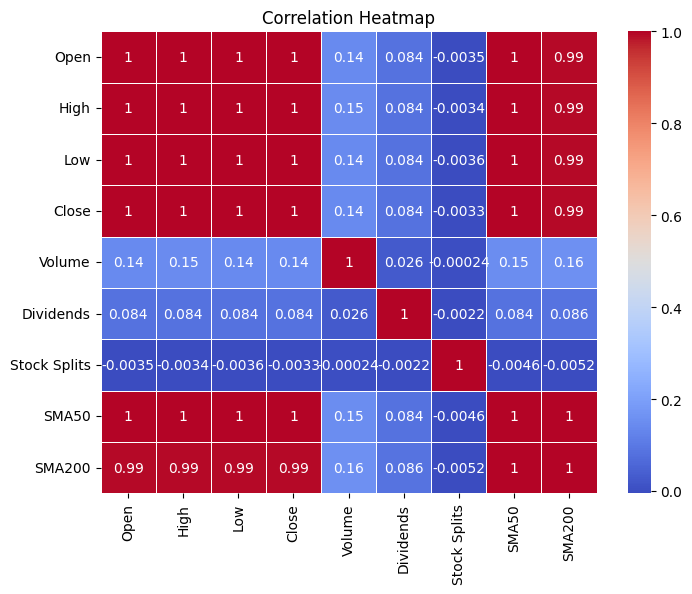

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()